# NewsAPI

In [ ]:
import requests
import pandas as pd


# news api-key:
# 1270f9ec3e2a40f3a58f67bba8b716f4


def call_news_api():
  url = "https://newsapi.org/v2/everything"
  params = {
      "q": "bitcoin",
      "from": "2025-04-01",
      "to": "2025-04-07",
      "apiKey": "1270f9ec3e2a40f3a58f67bba8b716f4"
  }
  response = requests.get(url, params=params)
  if response.status_code == 200:
      data = response.json()
      print(data)
      articles = data.get("articles", [])

      # Convert to DataFrame
      df = pd.DataFrame(articles)

      # Save to file
      df.to_excel("news_articles.xlsx", index=False)
      df.to_csv("news_articles.csv", index=False)
      print("Data saved to news_articles.xlsx")
  else:
      print(f"Error: {response.status_code}", response.text)

call_news_api()


{'status': 'ok', 'totalResults': 2736, 'articles': [{'source': {'id': None, 'name': 'Slashdot.org'}, 'author': 'msmash', 'title': "Larry Fink Says Bitcoin Could Replace the Dollar as the World's Reserve Currency Because of National Debt", 'description': "With America's national debt sitting comfortably over the $36.2 trillion mark, BlackRock CEO Larry Fink is warning the burden could one day be the reason the dollar is dethroned as the reserve currency of the world.\n From a report: He argues that decentralize…", 'url': 'https://slashdot.org/story/25/04/01/1840253/larry-fink-says-bitcoin-could-replace-the-dollar-as-the-worlds-reserve-currency-because-of-national-debt', 'urlToImage': 'https://a.fsdn.com/sd/topics/bitcoin_64.png', 'publishedAt': '2025-04-01T18:40:00Z', 'content': "As long as everyday people can't go into a marketplace and effortlessly, ubiquitously use it, that's not gonna happen.\r\nEven if it did become the world's currency, imagine the power consumption neede… [+111 c

# SkipGram

In [ ]:
import numpy as np
import requests
import re
import random
from itertools import product
from sklearn.metrics.pairwise import cosine_similarity

class SkipGramModel:
    def __init__(self, vocab_size, embedding_dim):
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.W1 = np.random.randn(vocab_size, embedding_dim)
        self.W2 = np.random.randn(embedding_dim, vocab_size)

    def forward(self, one_hot_vector):
        hidden_layer = np.dot(one_hot_vector, self.W1)
        output_layer = np.dot(hidden_layer, self.W2)
        output_layer = self._softmax(output_layer)
        return hidden_layer, output_layer

    def backward(self, one_hot_vector, target_vector, learning_rate=0.01):
        hidden_layer, output_layer = self.forward(one_hot_vector)
        # error = target_vector - output_layer
        error = output_layer - target_vector

        # Compute Gradients
        output_layer_gradient = np.outer(hidden_layer, error)
        hidden_layer_gradient = np.outer(one_hot_vector, np.dot(self.W2, error))

        # Update Weights
        self.W1 -= learning_rate * hidden_layer_gradient
        self.W2 -= learning_rate * output_layer_gradient

    def _softmax(self, x):
        exp_x = np.exp(x - np.max(x))
        return exp_x / exp_x.sum()


# LSTM vs RNN

SkipGram Epoch 1/10, Loss: 17.92420339257806
SkipGram Epoch 2/10, Loss: 13.668647044005889
SkipGram Epoch 3/10, Loss: 11.65341478241913
SkipGram Epoch 4/10, Loss: 10.313615185505975
SkipGram Epoch 5/10, Loss: 9.33882936901256
SkipGram Epoch 6/10, Loss: 8.592331705335155
SkipGram Epoch 7/10, Loss: 8.003148730739479
SkipGram Epoch 8/10, Loss: 7.526630698769284
SkipGram Epoch 9/10, Loss: 7.132482664186856
SkipGram Epoch 10/10, Loss: 6.80111377948975

Training RNN with hidden_dim=64
Epoch 1, Train Loss: 1.6290, Val Loss: 1.6118
Epoch 2, Train Loss: 1.5857, Val Loss: 1.6112
Epoch 3, Train Loss: 1.5544, Val Loss: 1.6124
Epoch 4, Train Loss: 1.5300, Val Loss: 1.6154
Epoch 5, Train Loss: 1.4836, Val Loss: 1.6198
Epoch 6, Train Loss: 1.4416, Val Loss: 1.6188
Epoch 7, Train Loss: 1.4373, Val Loss: 1.6167
Early stopping triggered


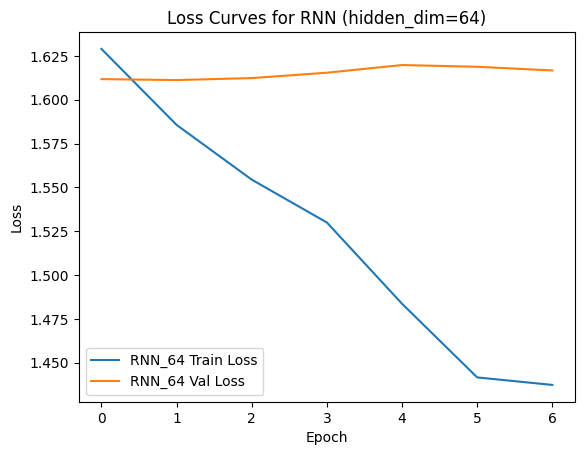


Training RNN with hidden_dim=128
Epoch 1, Train Loss: 1.6321, Val Loss: 1.6085
Epoch 2, Train Loss: 1.5550, Val Loss: 1.6080
Epoch 3, Train Loss: 1.4821, Val Loss: 1.6297
Epoch 4, Train Loss: 1.4229, Val Loss: 1.6549
Epoch 5, Train Loss: 1.3416, Val Loss: 1.7091
Epoch 6, Train Loss: 1.2300, Val Loss: 1.6482
Epoch 7, Train Loss: 1.1967, Val Loss: 1.6352
Early stopping triggered


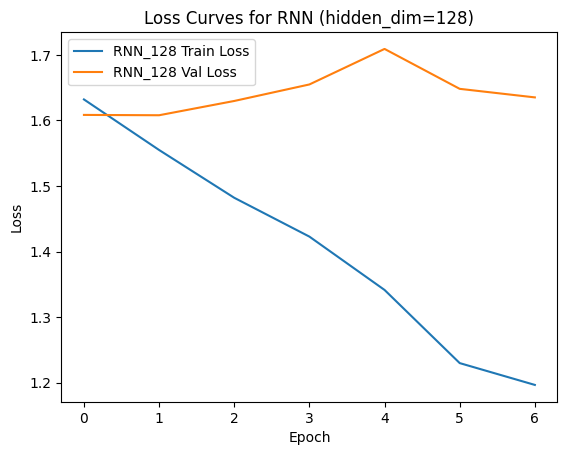


Training RNN with hidden_dim=256
Epoch 1, Train Loss: 1.6056, Val Loss: 1.6133
Epoch 2, Train Loss: 1.4849, Val Loss: 1.6608
Epoch 3, Train Loss: 1.4027, Val Loss: 1.7194
Epoch 4, Train Loss: 1.3148, Val Loss: 1.7704
Epoch 5, Train Loss: 1.2402, Val Loss: 1.8327
Epoch 6, Train Loss: 1.0874, Val Loss: 1.7831
Early stopping triggered


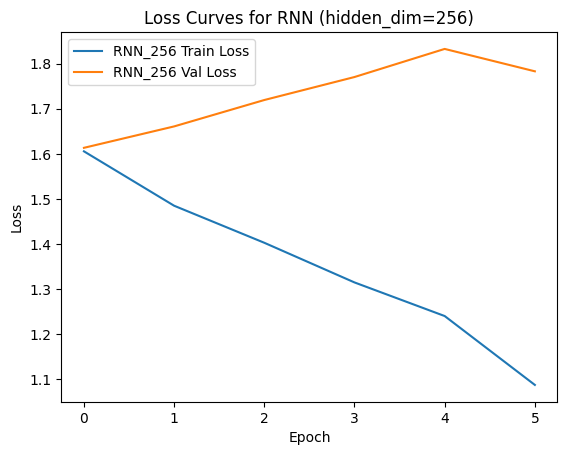


Training RNN with hidden_dim=512
Epoch 1, Train Loss: 1.6114, Val Loss: 1.6179
Epoch 2, Train Loss: 1.4844, Val Loss: 1.6673
Epoch 3, Train Loss: 1.5019, Val Loss: 1.7140
Epoch 4, Train Loss: 1.7669, Val Loss: 1.6695
Epoch 5, Train Loss: 1.7818, Val Loss: 1.6769
Epoch 6, Train Loss: 1.7220, Val Loss: 1.6129
Epoch 7, Train Loss: 1.7095, Val Loss: 1.6084
Epoch 8, Train Loss: 1.7121, Val Loss: 1.5996
Epoch 9, Train Loss: 1.7034, Val Loss: 1.6121
Epoch 10, Train Loss: 1.6936, Val Loss: 1.6081
Epoch 11, Train Loss: 1.6887, Val Loss: 1.6086
Epoch 12, Train Loss: 1.6914, Val Loss: 1.6076
Epoch 13, Train Loss: 1.7094, Val Loss: 1.6066
Early stopping triggered


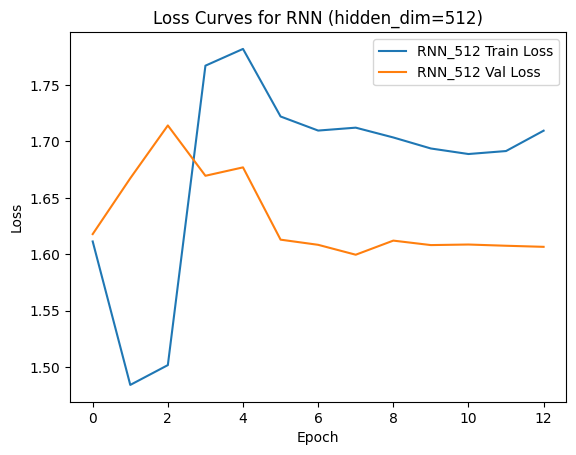


Training LSTM with hidden_dim=64
Epoch 1, Train Loss: 1.6066, Val Loss: 1.5989
Epoch 2, Train Loss: 1.5865, Val Loss: 1.5943
Epoch 3, Train Loss: 1.5798, Val Loss: 1.5903
Epoch 4, Train Loss: 1.5611, Val Loss: 1.5858
Epoch 5, Train Loss: 1.5310, Val Loss: 1.5916
Epoch 6, Train Loss: 1.4551, Val Loss: 1.4802
Epoch 7, Train Loss: 1.4142, Val Loss: 1.4729
Epoch 8, Train Loss: 1.3979, Val Loss: 1.4666
Epoch 9, Train Loss: 1.3892, Val Loss: 1.4567
Epoch 10, Train Loss: 1.3805, Val Loss: 1.4495
Epoch 11, Train Loss: 1.3581, Val Loss: 1.4483
Epoch 12, Train Loss: 1.3629, Val Loss: 1.4468
Epoch 13, Train Loss: 1.3642, Val Loss: 1.4463
Epoch 14, Train Loss: 1.3530, Val Loss: 1.4459
Epoch 15, Train Loss: 1.3599, Val Loss: 1.4451
Epoch 16, Train Loss: 1.3534, Val Loss: 1.4451
Epoch 17, Train Loss: 1.3505, Val Loss: 1.4450
Epoch 18, Train Loss: 1.3550, Val Loss: 1.4450
Epoch 19, Train Loss: 1.3578, Val Loss: 1.4450
Epoch 20, Train Loss: 1.3564, Val Loss: 1.4449


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


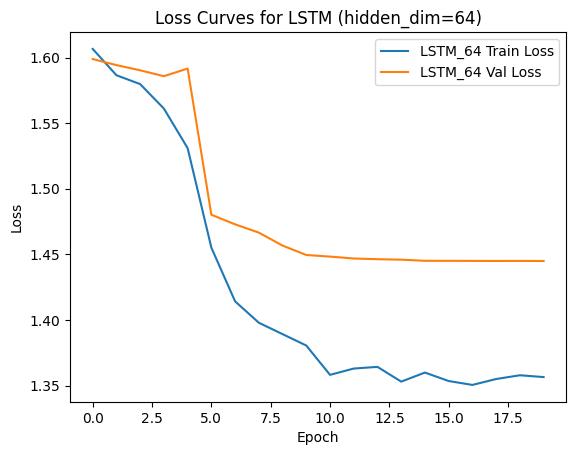


Training LSTM with hidden_dim=128
Epoch 1, Train Loss: 1.6082, Val Loss: 1.5971
Epoch 2, Train Loss: 1.5824, Val Loss: 1.5891
Epoch 3, Train Loss: 1.5630, Val Loss: 1.5691
Epoch 4, Train Loss: 1.5326, Val Loss: 1.5812
Epoch 5, Train Loss: 1.5093, Val Loss: 1.5368
Epoch 6, Train Loss: 1.4392, Val Loss: 1.5046
Epoch 7, Train Loss: 1.3920, Val Loss: 1.4564
Epoch 8, Train Loss: 1.3587, Val Loss: 1.4423
Epoch 9, Train Loss: 1.3410, Val Loss: 1.4305
Epoch 10, Train Loss: 1.3235, Val Loss: 1.4047
Epoch 11, Train Loss: 1.2959, Val Loss: 1.4028
Epoch 12, Train Loss: 1.2943, Val Loss: 1.4019
Epoch 13, Train Loss: 1.2916, Val Loss: 1.4000
Epoch 14, Train Loss: 1.2916, Val Loss: 1.3985
Epoch 15, Train Loss: 1.2875, Val Loss: 1.3973
Epoch 16, Train Loss: 1.2935, Val Loss: 1.3971
Epoch 17, Train Loss: 1.2923, Val Loss: 1.3970


KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import pandas as pd
import re

# 1. Pra-pemrosesan Data
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

class TextDataset(Dataset):
    def __init__(self, texts, labels, word2idx, max_len=100):
        self.texts = texts
        self.labels = labels
        self.word2idx = word2idx
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        sequence = [self.word2idx.get(word, 0) for word in text.split()][:self.max_len]
        sequence = sequence + [0] * (self.max_len - len(sequence))  # Padding
        return torch.tensor(sequence, dtype=torch.long), torch.tensor(label, dtype=torch.long)

# 2. Model RNN dan LSTM
class RNNModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, pretrained_embedding=None):
        super(RNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        if pretrained_embedding is not None:
            self.embedding.weight = nn.Parameter(torch.tensor(pretrained_embedding, dtype=torch.float32))
            # self.embedding.weight.requires_grad = False
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        output, hidden = self.rnn(embedded)
        hidden = self.dropout(hidden[-1])
        return self.fc(hidden)
        # return self.fc(hidden[-1])

class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, pretrained_embedding=None):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        if pretrained_embedding is not None:
            self.embedding.weight = nn.Parameter(torch.tensor(pretrained_embedding, dtype=torch.float32))
            # self.embedding.weight.requires_grad = False
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.dropout = nn.Dropout(0.5)  # Tambahkan dropout
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        output, (hidden, cell) = self.lstm(embedded)
        # return self.fc(hidden[-1])
        # return self.fc(hidden[0])
        hidden = self.dropout(hidden[-1])  # Terapkan dropout sebelum lapisan fc
        return self.fc(hidden)

# 3. Fungsi Pelatihan dan Evaluasi
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    best_val_loss = float('inf')
    patience = 5  # Jumlah epoch untuk menunggu
    patience_counter = 0
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)  # Kurangi lr setiap 5 epoch

    train_losses = []
    val_losses = []
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_losses.append(train_loss / len(train_loader))

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        val_losses.append(val_loss / len(val_loader))
        print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')

        # Early stopping
        if val_losses[-1] < best_val_loss:
            best_val_loss = val_losses[-1]
            patience_counter = 0
            # Simpan model terbaik
            torch.save(model.state_dict(), 'best_model.pt')
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered")
                break
        scheduler.step()  # Perbarui learning rate
    return train_losses, val_losses

def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
    return accuracy, precision, recall, f1

# 4. Fungsi SkipGram
def generate_training_data(words, window_size=2):
    all_words = [word for sentence in words for word in sentence]
    word2idx = {word: idx for idx, word in enumerate(set(all_words))}
    training_pairs = []
    for sentence in words:
        for i, target_word in enumerate(sentence):
            context_range = range(max(0, i - window_size), min(len(sentence), i + window_size + 1))
            for j in context_range:
                if i != j:
                    training_pairs.append((target_word, sentence[j]))
    return training_pairs, word2idx

def train_model_skipgram(training_pairs, word2idx, vocab_size, embedding_dim=100, epochs=10):
    model = SkipGramModel(vocab_size, embedding_dim)
    for epoch in range(epochs):
        total_loss = 0
        for target_word, context_word in training_pairs:
            target_vector = np.zeros(vocab_size)
            target_vector[word2idx[target_word]] = 1
            context_vector = np.zeros(vocab_size)
            context_vector[word2idx[context_word]] = 1
            hidden, output = model.forward(target_vector)
            model.backward(target_vector, context_vector)
            total_loss += -np.log(output[word2idx[context_word]])
        print(f"SkipGram Epoch {epoch+1}/{epochs}, Loss: {total_loss / len(training_pairs)}")
    return model

class SkipGramModel:
    def __init__(self, vocab_size, embedding_dim):
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.W1 = np.random.randn(vocab_size, embedding_dim)
        self.W2 = np.random.randn(embedding_dim, vocab_size)

    def forward(self, one_hot_vector):
        hidden_layer = np.dot(one_hot_vector, self.W1)
        output_layer = np.dot(hidden_layer, self.W2)
        output_layer = self._softmax(output_layer)
        return hidden_layer, output_layer

    def backward(self, one_hot_vector, target_vector, learning_rate=0.01):
        hidden_layer, output_layer = self.forward(one_hot_vector)
        error = output_layer - target_vector
        output_layer_gradient = np.outer(hidden_layer, error)
        hidden_layer_gradient = np.outer(one_hot_vector, np.dot(self.W2, error))
        self.W1 -= learning_rate * hidden_layer_gradient
        self.W2 -= learning_rate * output_layer_gradient

    def _softmax(self, x):
        exp_x = np.exp(x - np.max(x))
        return exp_x / exp_x.sum()

# 5. Main Execution
def main():
    best_window_size = 4
    best_embedding_dim = 50
    num_epochs = 20
    hidden_dims = [64, 128, 256, 512]
    models = {"RNN": RNNModel, "LSTM": LSTMModel}

    # Load dataset SkipGram
    df_skipgram = pd.read_csv("news_articles.csv")
    news_data = df_skipgram["description"].dropna().tolist()
    sample_text = [re.findall(r'\b\w+\b', desc.lower()) for desc in news_data]

    # Latih SkipGram untuk mendapatkan word2idx dan embedding
    training_pairs, word2idx = generate_training_data(sample_text, window_size=best_window_size)  # Gunakan window_size terbaik Anda
    embedding_dim = best_embedding_dim  # Gunakan embedding_dim terbaik Anda, misalnya 100
    skipgram_model = train_model_skipgram(training_pairs, word2idx, len(word2idx), embedding_dim=embedding_dim)
    pretrained_embedding = skipgram_model.W1  # Embedding dari SkipGram

    # Tambahkan <PAD> ke word2idx
    if "<PAD>" not in word2idx:
        word2idx["<PAD>"] = len(word2idx)
        pretrained_embedding = np.vstack([pretrained_embedding, np.zeros(embedding_dim)])  # Tambah vektor nol untuk <PAD>

    # Load dataset RNN/LSTM
    df = pd.read_csv("df_file.csv")
    texts = df['Text'].apply(preprocess_text).tolist()
    labels = df['Label'].tolist()

    # Perbarui word2idx dengan kata-kata dari df_file.csv
    for text in texts:
        for word in text.split():
            if word not in word2idx:
                word2idx[word] = len(word2idx)
                pretrained_embedding = np.vstack([pretrained_embedding, np.random.randn(embedding_dim)])

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42, stratify=labels)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

    # DataLoader
    train_dataset = TextDataset(X_train, y_train, word2idx, max_len=100)
    val_dataset = TextDataset(X_val, y_val, word2idx, max_len=100)
    test_dataset = TextDataset(X_test, y_test, word2idx, max_len=100)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)
    test_loader = DataLoader(test_dataset, batch_size=32)

    # Parameter Grid Search
    # hidden_dims = [64, 128, 256, 512]
    # models = {"RNN": RNNModel, "LSTM": LSTMModel}
    results = {}

    for model_name, ModelClass in models.items():
        for hidden_dim in hidden_dims:
            print(f"\nTraining {model_name} with hidden_dim={hidden_dim}")
            model = ModelClass(
                vocab_size=len(word2idx),
                embedding_dim=embedding_dim,
                hidden_dim=hidden_dim,
                output_dim=5,  # 5 kelas
                pretrained_embedding=pretrained_embedding
            )
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

            # Train
            train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=num_epochs)

            # Evaluate
            accuracy, precision, recall, f1 = evaluate_model(model, test_loader)
            results[f"{model_name}_{hidden_dim}"] = {
                "train_losses": train_losses,
                "val_losses": val_losses,
                "accuracy": accuracy,
                "precision": precision,
                "recall": recall,
                "f1": f1
            }

            # Plot loss curves
            plt.plot(train_losses, label=f"{model_name}_{hidden_dim} Train Loss")
            plt.plot(val_losses, label=f"{model_name}_{hidden_dim} Val Loss")
            plt.legend()
            plt.title(f"Loss Curves for {model_name} (hidden_dim={hidden_dim})")
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.show()

    # Print Results
    for config, metrics in results.items():
        print(f"\nResults for {config}:")
        print(f"Accuracy: {metrics['accuracy']:.4f}")
        print(f"Precision: {metrics['precision']:.4f}")
        print(f"Recall: {metrics['recall']:.4f}")
        print(f"F1-Score: {metrics['f1']:.4f}")

if __name__ == "__main__":
    main()

# Word2Vec - RNN & LSTM

In [ ]:
!pip install --upgrade numpy

!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 67.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━


Training LSTM with hidden_dim=128
Epoch 1, Train Loss: 1.5926, Val Loss: 1.5651
Epoch 2, Train Loss: 1.4870, Val Loss: 1.4399
Epoch 3, Train Loss: 1.3189, Val Loss: 1.3153
Epoch 4, Train Loss: 1.1368, Val Loss: 1.2609
Epoch 5, Train Loss: 0.8888, Val Loss: 1.0314
Epoch 6, Train Loss: 0.6848, Val Loss: 1.0074
Epoch 7, Train Loss: 0.6167, Val Loss: 0.9528
Epoch 8, Train Loss: 0.5919, Val Loss: 0.9390
Epoch 9, Train Loss: 0.5718, Val Loss: 0.9236
Epoch 10, Train Loss: 0.5566, Val Loss: 0.9151
Epoch 11, Train Loss: 0.5076, Val Loss: 0.9107
Epoch 12, Train Loss: 0.5036, Val Loss: 0.9098
Epoch 13, Train Loss: 0.5098, Val Loss: 0.9107
Epoch 14, Train Loss: 0.5021, Val Loss: 0.9080
Epoch 15, Train Loss: 0.4950, Val Loss: 0.9131
Epoch 16, Train Loss: 0.4952, Val Loss: 0.9131
Epoch 17, Train Loss: 0.4918, Val Loss: 0.9132
Epoch 18, Train Loss: 0.5012, Val Loss: 0.9132
Epoch 19, Train Loss: 0.5016, Val Loss: 0.9129
Early stopping triggered


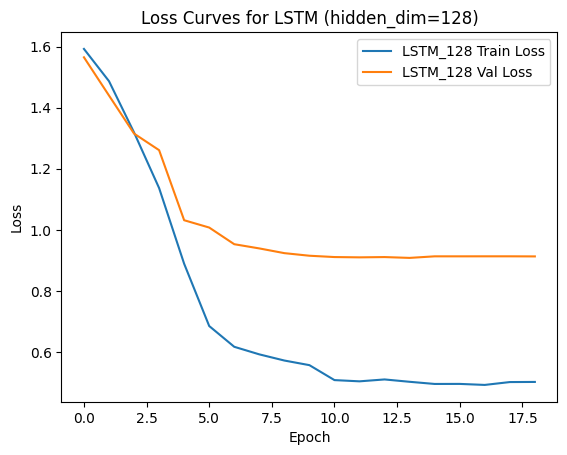


Training LSTM with hidden_dim=256
Epoch 1, Train Loss: 1.5833, Val Loss: 1.5232
Epoch 2, Train Loss: 1.4629, Val Loss: 1.4577
Epoch 3, Train Loss: 1.3144, Val Loss: 1.5229
Epoch 4, Train Loss: 1.0965, Val Loss: 1.2323
Epoch 5, Train Loss: 0.8796, Val Loss: 1.0404
Epoch 6, Train Loss: 0.6544, Val Loss: 0.9688
Epoch 7, Train Loss: 0.5851, Val Loss: 0.9338
Epoch 8, Train Loss: 0.5574, Val Loss: 0.9590
Epoch 9, Train Loss: 0.5183, Val Loss: 0.9548
Epoch 10, Train Loss: 0.4820, Val Loss: 0.9432
Epoch 11, Train Loss: 0.4635, Val Loss: 0.9115
Epoch 12, Train Loss: 0.4467, Val Loss: 0.9064
Epoch 13, Train Loss: 0.4450, Val Loss: 0.9176
Epoch 14, Train Loss: 0.4340, Val Loss: 0.9081
Epoch 15, Train Loss: 0.4374, Val Loss: 0.9084
Epoch 16, Train Loss: 0.4322, Val Loss: 0.9091
Epoch 17, Train Loss: 0.4326, Val Loss: 0.9108
Early stopping triggered


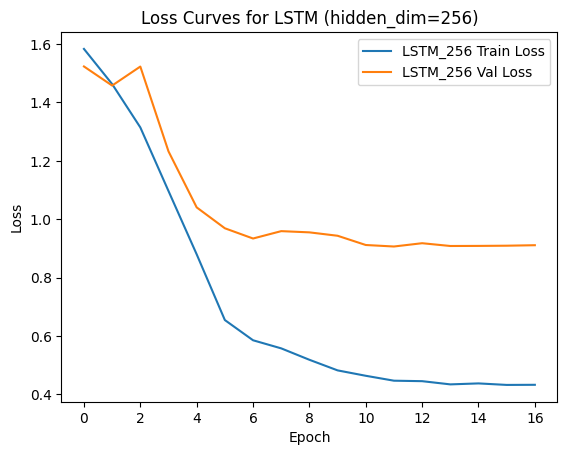


Training LSTM with hidden_dim=512
Epoch 1, Train Loss: 1.5899, Val Loss: 1.5273
Epoch 2, Train Loss: 1.4343, Val Loss: 1.4560
Epoch 3, Train Loss: 1.3405, Val Loss: 1.3955
Epoch 4, Train Loss: 1.1769, Val Loss: 1.2282
Epoch 5, Train Loss: 0.9422, Val Loss: 1.1348
Epoch 6, Train Loss: 0.7106, Val Loss: 1.0961
Epoch 7, Train Loss: 0.6578, Val Loss: 1.0380
Epoch 8, Train Loss: 0.6060, Val Loss: 1.0204
Epoch 9, Train Loss: 0.6000, Val Loss: 1.0390
Epoch 10, Train Loss: 0.5597, Val Loss: 1.0447
Epoch 11, Train Loss: 0.5237, Val Loss: 0.9762
Epoch 12, Train Loss: 0.5070, Val Loss: 0.9865
Epoch 13, Train Loss: 0.4999, Val Loss: 0.9806
Epoch 14, Train Loss: 0.4915, Val Loss: 0.9864
Epoch 15, Train Loss: 0.4980, Val Loss: 0.9798
Epoch 16, Train Loss: 0.4891, Val Loss: 0.9813
Early stopping triggered


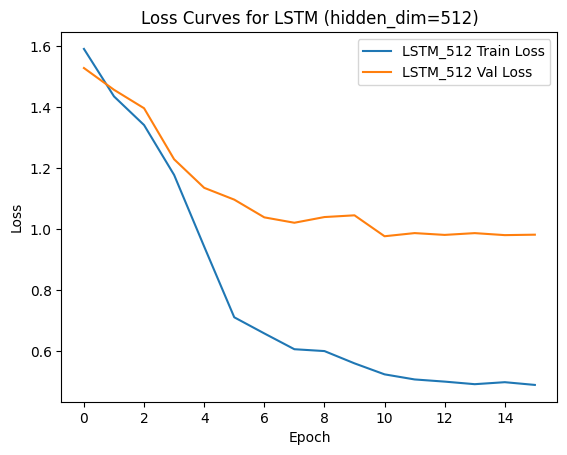


Training RNN with hidden_dim=128
Epoch 1, Train Loss: 1.6380, Val Loss: 1.6370
Epoch 2, Train Loss: 1.5997, Val Loss: 1.6047
Epoch 3, Train Loss: 1.5570, Val Loss: 1.6245
Epoch 4, Train Loss: 1.5046, Val Loss: 1.6079
Epoch 5, Train Loss: 1.4589, Val Loss: 1.6163
Epoch 6, Train Loss: 1.3428, Val Loss: 1.6139
Epoch 7, Train Loss: 1.3211, Val Loss: 1.6155
Early stopping triggered


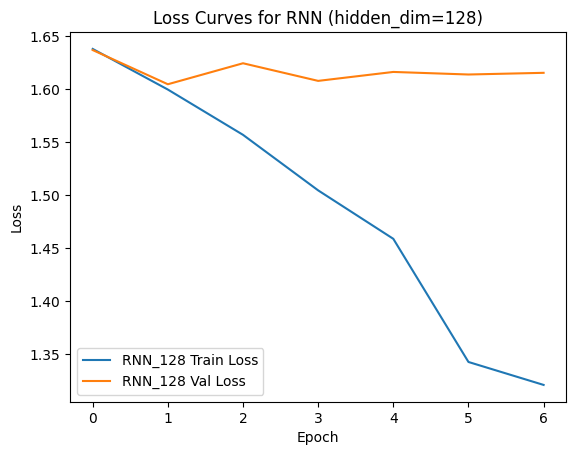


Training RNN with hidden_dim=256
Epoch 1, Train Loss: 1.6605, Val Loss: 1.6260
Epoch 2, Train Loss: 1.5871, Val Loss: 1.6067
Epoch 3, Train Loss: 1.5346, Val Loss: 1.6259
Epoch 4, Train Loss: 1.4404, Val Loss: 1.6848
Epoch 5, Train Loss: 1.3415, Val Loss: 1.6391
Epoch 6, Train Loss: 1.1551, Val Loss: 1.5811
Epoch 7, Train Loss: 1.0587, Val Loss: 1.5952
Epoch 8, Train Loss: 0.9836, Val Loss: 1.5938
Epoch 9, Train Loss: 0.9200, Val Loss: 1.6215
Epoch 10, Train Loss: 0.8565, Val Loss: 1.6175
Epoch 11, Train Loss: 0.7858, Val Loss: 1.5372
Epoch 12, Train Loss: 0.7655, Val Loss: 1.5417
Epoch 13, Train Loss: 0.7556, Val Loss: 1.5426
Epoch 14, Train Loss: 0.7504, Val Loss: 1.5397
Epoch 15, Train Loss: 0.7507, Val Loss: 1.5327
Epoch 16, Train Loss: 0.7357, Val Loss: 1.5302
Epoch 17, Train Loss: 0.7366, Val Loss: 1.5266
Epoch 18, Train Loss: 0.7327, Val Loss: 1.5254
Epoch 19, Train Loss: 0.7288, Val Loss: 1.5244
Epoch 20, Train Loss: 0.7321, Val Loss: 1.5231
Epoch 21, Train Loss: 0.7322, Val L

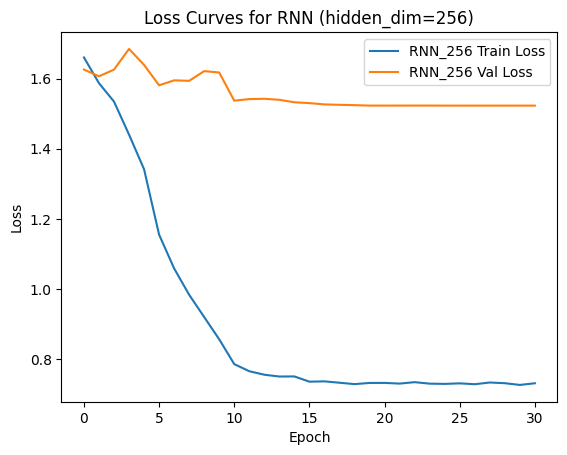


Training RNN with hidden_dim=512
Epoch 1, Train Loss: 1.6770, Val Loss: 1.6222
Epoch 2, Train Loss: 1.5740, Val Loss: 1.6339
Epoch 3, Train Loss: 1.5150, Val Loss: 1.6802
Epoch 4, Train Loss: 1.4369, Val Loss: 1.5954
Epoch 5, Train Loss: 1.3543, Val Loss: 1.7388
Epoch 6, Train Loss: 1.1548, Val Loss: 1.6337
Epoch 7, Train Loss: 1.0334, Val Loss: 1.6535
Epoch 8, Train Loss: 0.9447, Val Loss: 1.7125
Epoch 9, Train Loss: 0.8702, Val Loss: 1.7297
Early stopping triggered


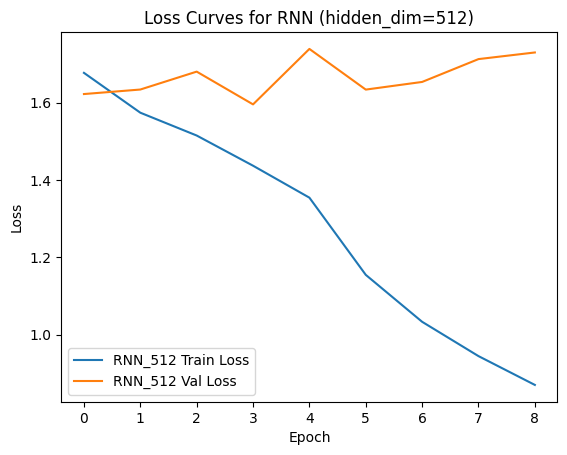


Results for LSTM_128:
Accuracy: 0.6876
Precision: 0.6906
Recall: 0.6876
F1-Score: 0.6785

Results for LSTM_256:
Accuracy: 0.6787
Precision: 0.6748
Recall: 0.6787
F1-Score: 0.6741

Results for LSTM_512:
Accuracy: 0.6494
Precision: 0.6536
Recall: 0.6494
F1-Score: 0.6395

Results for RNN_128:
Accuracy: 0.2472
Precision: 0.2345
Recall: 0.2472
F1-Score: 0.2180

Results for RNN_256:
Accuracy: 0.3326
Precision: 0.3278
Recall: 0.3326
F1-Score: 0.3249

Results for RNN_512:
Accuracy: 0.2517
Precision: 0.2485
Recall: 0.2517
F1-Score: 0.2490


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import pandas as pd
import re
from gensim.models import Word2Vec

# 1. Pra-pemrosesan Data
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

class TextDataset(Dataset):
    def __init__(self, texts, labels, word2idx, max_len=100):
        self.texts = texts
        self.labels = labels
        self.word2idx = word2idx
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        sequence = [self.word2idx.get(word, 0) for word in text.split()][:self.max_len]
        sequence = sequence + [0] * (self.max_len - len(sequence))  # Padding
        return torch.tensor(sequence, dtype=torch.long), torch.tensor(label, dtype=torch.long)

# 2. Model RNN dan LSTM
class RNNModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, pretrained_embedding=None):
        super(RNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        if pretrained_embedding is not None:
            self.embedding.weight = nn.Parameter(torch.tensor(pretrained_embedding, dtype=torch.float32))
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        output, hidden = self.rnn(embedded)
        hidden = self.dropout(hidden[-1])
        return self.fc(hidden)

class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, pretrained_embedding=None):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        # if pretrained_embedding is not None:
        #     self.embedding.weight = nn.Parameter(torch.tensor(pretrained_embedding, dtype=torch.float32))
        # self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        # self.dropout = nn.Dropout(0.5)
        # self.fc = nn.Linear(hidden_dim, output_dim)
        if pretrained_embedding is not None:
            self.embedding.weight = nn.Parameter(torch.tensor(pretrained_embedding, dtype=torch.float32))

        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        output, (hidden, cell) = self.lstm(embedded)
        # hidden = self.dropout(hidden[-1])
        # return self.fc(hidden)
        # Concatenate the forward and backward hidden states from the last layer
        hidden = torch.cat((hidden[-2], hidden[-1]), dim=1)
        hidden = self.dropout(hidden)
        return self.fc(hidden)

# 3. Fungsi Pelatihan dan Evaluasi
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    best_val_loss = float('inf')
    patience = 5
    patience_counter = 0
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

    train_losses = []
    val_losses = []
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_losses.append(train_loss / len(train_loader))

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        val_losses.append(val_loss / len(val_loader))
        print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')

        if val_losses[-1] < best_val_loss:
            best_val_loss = val_losses[-1]
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pt')
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered")
                break
        scheduler.step()
    return train_losses, val_losses

def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
    return accuracy, precision, recall, f1

# 4. Main Execution
def main():
    best_window_size = 10
    best_embedding_dim = 100
    num_epochs = 50
    hidden_dims = [128, 256, 512]
    # hidden_dims = [32, 64, 128]  # Lower hidden dimensions
    models = {"LSTM": LSTMModel, "RNN": RNNModel}

    # Load dataset for Word2Vec
    df_word2vec = pd.read_csv("news_article.csv")
    news_data = df_word2vec["description"].dropna().tolist()
    sample_text = [preprocess_text(desc).split() for desc in news_data]

    # Train Word2Vec
    w2v_model = Word2Vec(sentences=sample_text, vector_size=best_embedding_dim, window=best_window_size, min_count=1, workers=4)
    word2idx = {word: idx for idx, word in enumerate(w2v_model.wv.index_to_key)}
    pretrained_embedding = w2v_model.wv.vectors

    # Tambahkan <PAD> ke word2idx
    if "<PAD>" not in word2idx:
        word2idx["<PAD>"] = len(word2idx)
        pretrained_embedding = np.vstack([pretrained_embedding, np.zeros(best_embedding_dim)])

    # Load dataset RNN/LSTM
    df = pd.read_csv("df_file.csv")
    texts = df['Text'].apply(preprocess_text).tolist()
    labels = df['Label'].tolist()

    # Perbarui word2idx dan pretrained_embedding
    for text in texts:
        for word in text.split():
            if word not in word2idx:
                word2idx[word] = len(word2idx)
                pretrained_embedding = np.vstack([pretrained_embedding, np.random.randn(best_embedding_dim)])

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42, stratify=labels)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

    # DataLoader
    train_dataset = TextDataset(X_train, y_train, word2idx)
    val_dataset = TextDataset(X_val, y_val, word2idx)
    test_dataset = TextDataset(X_test, y_test, word2idx)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)
    test_loader = DataLoader(test_dataset, batch_size=32)

    # Training and Evaluation
    results = {}
    for model_name, ModelClass in models.items():
        for hidden_dim in hidden_dims:
            print(f"\nTraining {model_name} with hidden_dim={hidden_dim}")
            model = ModelClass(
                vocab_size=len(word2idx),
                embedding_dim=best_embedding_dim,
                hidden_dim=hidden_dim,
                output_dim=5,  # 5 kelas
                pretrained_embedding=pretrained_embedding
            )
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

            # Train
            train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=num_epochs)

            # Evaluate
            accuracy, precision, recall, f1 = evaluate_model(model, test_loader)
            results[f"{model_name}_{hidden_dim}"] = {
                "train_losses": train_losses,
                "val_losses": val_losses,
                "accuracy": accuracy,
                "precision": precision,
                "recall": recall,
                "f1": f1
            }

            # Plot loss curves
            plt.plot(train_losses, label=f"{model_name}_{hidden_dim} Train Loss")
            plt.plot(val_losses, label=f"{model_name}_{hidden_dim} Val Loss")
            plt.legend()
            plt.title(f"Loss Curves for {model_name} (hidden_dim={hidden_dim})")
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.show()

    # Print Results
    for config, metrics in results.items():
        print(f"\nResults for {config}:")
        print(f"Accuracy: {metrics['accuracy']:.4f}")
        print(f"Precision: {metrics['precision']:.4f}")
        print(f"Recall: {metrics['recall']:.4f}")
        print(f"F1-Score: {metrics['f1']:.4f}")

if __name__ == "__main__":
    main()